In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.snowball import FrenchStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from IPython.display import display, Markdown, Latex, Image
import urllib.request
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = None
pd.options.display.max_rows = 300

In [2]:
def RetraitementNom (Saisie): #retraite une chaine de caractère saisie

    #Normalisation
    
    Accent = ['é', 'è', 'ê', 'à', 'ù', 'û', 'ç', 'ô', 'î', 'ï', 'â','ó']
    SansAccent = ['e', 'e', 'e', 'a', 'u', 'u', 'c', 'o', 'i', 'i', 'a','o']

    Saisie2=Saisie.lower()
    Saisie2=Saisie2.strip()
    for i in range(len(Accent)):    # remplacement des caractères avec accent par les caractères sans accent correspondant
        Saisie2=Saisie2.replace(Accent[i],SansAccent[i])
    
    #Tokenisation
    tokenizer = nltk.RegexpTokenizer(r'\w*')
    Saisie2=tokenizer.tokenize(Saisie2)
    #Supression des stop words
    sw=set()
    sw.update(tuple(nltk.corpus.stopwords.words('french')))
    Saisie2=[mot for mot in Saisie2 if mot not in list(sw)  ]
    #racinisation
    stemmer = FrenchStemmer()
    Saisie2= [stemmer.stem(mot) for mot in Saisie2]
    
    #retour à la forme de chaine de caractères

    DeToK = TreebankWordDetokenizer()
    Saisie2= DeToK.detokenize(Saisie2)
    return (Saisie2)

In [24]:
def polar(Nom, Energie, Marque,GSat,GNSat,AutG,Suc,Prot,Sel,Fibr):

    chiffres=np.concatenate((GSat,GNSat,AutG,Suc,Prot,Sel,Fibr), axis=None)
    libelles=['Acides gras \n saturés', 'Acides gras\n non saturés','Autres glucides',\
              'Sucres','Protéines','Sel','Fibres']

    LabelPla=np.linspace(0,2*np.pi, len(libelles))
    ax = plt.subplot(111, polar=True)
    plt.fill(LabelPla, chiffres)
    ax.set_rlabel_position(270)
    plt.plot(LabelPla,chiffres)
    #plt.yticks(np.linspace(0,100,6))
    lines, labels = plt.thetagrids(np.degrees(LabelPla), labels=libelles)
    plt.title("Principales valeurs nutritionnelles :", y=1.2)
    plt.xlabel('g pour 100g')
    

In [4]:
def classviol (Prod,B, colonne, titre, couleur):
    Rang=B.loc[B['code']==Prod['code'],'rang'].iloc[0].astype('int')
    sns.violinplot(B['Nutri-Score'], orient='v', color=couleur)
    plt.gca().invert_yaxis()
    plt.annotate("{} \nNutri-Score :{} ({})\nClassement :{} sur {} produits notés".format(Prod['Nom Produit'],\
    Prod['Nutri-Score'].astype('int'),Prod['Note de Nutri-Score'], Rang, len(B[pd.notnull(B['rang'])])),(0,Prod['Nutri-Score']),\
    xytext=(0.4,Prod['Nutri-Score']), arrowprops=dict(facecolor='black', shrink=0.05))
    plt.title('Performance du produit {} \n au sein {} \n{} ({} produits)'.\
    format(Prod['Nom Produit'],titre,Prod[colonne], len(B)))
    return()

In [5]:
def trouvemeilleur (b, Ind, Prod): # Trouve les 3 produits aux classementx immédiatement supérieurs
    R=b.loc[Ind,'rang']
    b2=b[b['rang']<R]
    taille=len(b2)
    if taille==0 :
        print("Il s'agit du meilleur produit de sa catégorie")
    else :
        return(b2.sort_values('rang', ascending=False).head(5))

In [6]:
def AfficheProduit(Produ) :
    print ('Produit : {}'.format(Produ['Nom Produit']))
    if pd.notnull(Produ['Marque']):
        print ('Marque : {}'.format(Produ['Marque']))
    print('\n')
    print('Energie : {} kcal/100g'.format(int(Produ['Energie'])))
    print('Graisses : {} g'.format(Produ['Graisses']))
    print('\tdont Graisses saturées : {} g'.format(Produ['Graisses saturees']))
    print('Glucides : {} g'.format(Produ['Glucides']))
    print('\tdont Sucres : {} g'.format(Produ['Sucres']))
    print('Proteines : {} g'.format(Produ['Proteines']))
    print('Sel : {} g'.format(Produ['Sel']))       
        
    if pd.notnull(Produ['Image']):
        AfficheImage(Produ['Image'],"Meil1.png")
    else :
        print('Aucune image associée à ce produit')
    print('Nutri-Score : {}'.format(Produ['Note de Nutri-Score'].upper()))
    print('Note de Nutri-Score : {}'.format(int(Produ['Nutri-Score'])))
    
    if pd.notnull(Produ['NOVA']):
        print('NOVA group : {}'.format(int(Produ['NOVA'])))
    if pd.notnull(Produ['Point de vente']):
        print('Distribué par : {}'.format(Produ['Point de vente']))
    if pd.notnull(Produ['Pays']):
        print('Vendu en {}'.format(Produ['Pays']))
    #if pd.notnull(Produ['Label']):
     #   print('Spécificités : {}'.format(Produ['Label']))    
        
        
    display(Markdown('________________'))

In [7]:
def AfficheEtiquette(Prod):
    print('Energie : {} kcal/100g'.format(int(Prod['Energie'])))
    print('Graisses : {} g'.format(Prod['Graisses']))
    print('\tdont Graisses saturées : {} g'.format(Prod['Graisses saturees']))
    print('Glucides : {} g'.format(Prod['Glucides']))
    print('\tdont Sucres : {} g'.format(Prod['Sucres']))
    print('Proteines : {} g'.format(Prod['Proteines']))
    print('Sel : {} g'.format(Prod['Sel']))

In [8]:
def AfficheImage(photo, nom):
    img=urllib.request.urlretrieve(photo, nom)
    return (display(Image(img[0])))

In [9]:
def chercheliste(element,serie): #cherche un élement dans une colonne sous forme de liste de noms séparés par des virgules
                                #et retourne la liste des index des enregistrements OK
    Temp=(serie.str.split(',').explode().str.lower().str.replace('-',' ').str.strip()).str.contains(element)
    IndexOK=Temp[Temp==True].index 
    return (IndexOK)

### loading de la base modifiée

In [10]:
base=pd.read_csv('BaseRetraitee.csv', dtype={'code':'str'})
base=base.loc[:,base.columns[1:]] # On retire la première colonne inutile

#### Definition de groupes de colonnes utiles

In [11]:
Etiquette = ['Energie','Graisses saturees','Graisses','Glucides','Sucres','Proteines', 'Sel']
Etiquette2 = ['Graisses saturees','Graisses','Glucides','Sucres','Proteines', 'Sel']

## Les filtres

### Filtre du Pays

In [12]:
Pays=np.nan
Pays='france'
if pd.notnull(Pays):
    filtre= chercheliste(Pays,base['Pays'])
    print('{} produits sont vendus dans le pays {}'.format(len(filtre), Pays))
else :
    filtre=base.index
    print("Aucun pays n'a été défini")

257989 produits sont vendus dans le pays france


In [13]:
base2 = base.loc[np.isin(base.index,filtre)] 

### Filtre du point de vente

In [14]:
Store=np.nan
Store='carrefour'
if pd.notnull(Store):
    filtre1= chercheliste(Store,base['Point de vente'])
    print('{} produits sont vendus dans le point de vente {}'.format(len(filtre1), Store))
else :
    filtre1=base.index
    print("Aucun point de vente n'a été défini")

14812 produits sont vendus dans le point de vente carrefour


In [15]:
base3 = base2.loc[np.isin(base2.index,filtre1)] 

### Filtre du label

In [16]:
Label=np.nan
Label='organic'
if pd.notnull(Label):
    filtre2= chercheliste(Label,base['Label'])
    print('{} produits sont vendus avec le label {}'.format(len(filtre2), Label))
else :
    filtre2=base.index
    print("Aucun label n'a été sélectionné")

56551 produits sont vendus avec le label organic


In [17]:
base4 = base3.loc[np.isin(base3.index,filtre2)] 

#### Génération d'un code barre dans la base

In [18]:
A=pd.notnull(base4['Nutri-Score'])
B=pd.notnull(base4['Sous-groupe PNNS 2'])
C=pd.notnull(base4['Marque'])

Enr=np.random.choice(base4.loc[(A & B & C),'code'])

In [19]:
#Enr='8851011322252' lait de coco
#Enr='8480024830418' lait de soja
#'3560070538300'  pate feuilletée
#Enr=3347435990504 #quinoa
#Enr='3021690019315' cassoulet
#'8410810011257' ratatouille
#Enr='3257983995305'
# 3271518124503 ratatouille
# 3257983995305
# 2285476024660 morbier

#### Recherche du code barre

In [20]:
if Enr :
    produit=base.loc[base['code']==Enr]
    IndProduit=produit.index
    NomProd=produit.loc[IndProduit,'Nom Produit 2S']
    baseNomProd=base[base['Nom Produit 2S']==NomProd.iloc[0]]
Prod=produit.iloc[0]    # Retourne la ligne de produit sous forme de Series pandas
Ind=produit.iloc[0].name
Prod

Unnamed: 0.1                                                         795939
code                                                          3245411878832
Nom Produit                                                          Ananas
Marque                                                            Carrefour
Categories                Aliments et boissons à base de végétaux, Alime...
Label                     Organic,EU Organic,LK-BIO-149,No added sugar,T...
Point de vente                                                    Carrefour
Pays                                                                 France
Nutri-Score                                                            -2.0
Note de Nutri-Score                                                       A
NOVA                                                                    1.0
Groupe PNNS                                           Fruits and vegetables
Sous-groupe PNNS                                                     Fruits
Categorie pr

### affichge du produit

Produit : Ananas
Marque : Carrefour


Energie : 64 kcal/100g
Graisses : 0.6 g
	dont Graisses saturées : 0.2 g
Glucides : 15.0 g
	dont Sucres : 15.0 g
Proteines : 0.6 g
Sel : 0.0 g


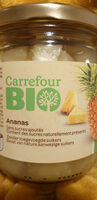

Nutri-Score : A
Note de Nutri-Score : -2
NOVA group : 1
Distribué par : Carrefour
Vendu en France


________________

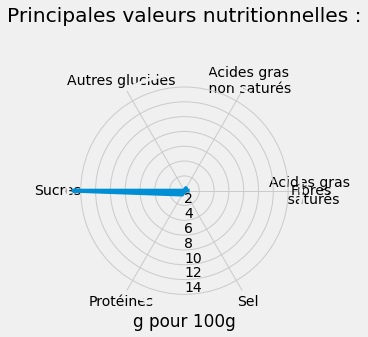

In [25]:
AfficheProduit(Prod)
Nutriments=Prod[Etiquette2]

GSat=Prod['Graisses saturees']
GNSat=Prod['Graisses']-Prod['Graisses saturees']
AutG=Prod['Glucides']-Prod['Sucres']
Suc=Prod['Sucres']
Prot=Prod['Proteines']
Sel=Prod['Sel']
Fibr=Prod['Fibres']

polar(Prod['Nom Produit'], Prod['Energie'],Prod['Marque'],GSat,GNSat,AutG,Suc,Prot,Sel,Fibr)

### Base de produits avec le même nom

<ipython-input-26-fc5adf2018e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseProd['rang']=baseProd.loc[:,'Nutri-Score'].rank(method='min')
/home/olivier/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/olivier/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Nombre de produits portant le même nom dans la base : 49


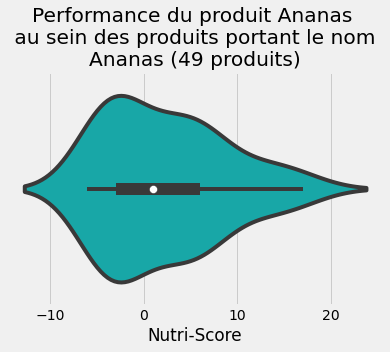

In [26]:
baseProd=base2.loc[base['Nom Produit 2S']==Prod['Nom Produit 2S'],:]
baseProd['rang']=baseProd.loc[:,'Nutri-Score'].rank(method='min')

if len(baseProd)<=1 :
    print("Il n'existe pas d'autres produits de ce nom dans la base")
else:
    print ('Nombre de produits portant le même nom dans la base : {}'.format(len(baseProd)))
    classviol(Prod, baseProd, 'Nom Produit', 'des produits portant le nom', 'c')


Produit : Ananas


Energie : 48 kcal/100g
Graisses : 0.12 g
	dont Graisses saturées : 0.0 g
Glucides : 12.63 g
	dont Sucres : 12.63 g
Proteines : 0.54 g
Sel : 0.0 g


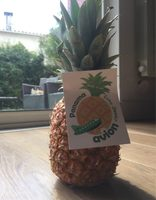

Nutri-Score : A
Note de Nutri-Score : -3
Vendu en France


________________

Produit : Ananas


Energie : 54 kcal/100g
Graisses : 0.24 g
	dont Graisses saturées : 0.01 g
Glucides : 11.3 g
	dont Sucres : 10.1 g
Proteines : 0.52 g
Sel : 0.0 g


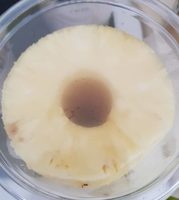

Nutri-Score : A
Note de Nutri-Score : -3
Vendu en France


________________

In [27]:
Class=baseProd.loc[Ind,'rang']
baseProd2=baseProd.loc[baseProd['rang']<Class]
if len(baseProd2) <3:
    taille=len(baseProd2)
else :
    taille =2
for i in range(taille):
    MeilProd=trouvemeilleur(baseProd,Ind, Prod).iloc[i]
    AfficheProduit(MeilProd)

### Base de produits avec la même catégorie principale

In [28]:
baseCat=base2.loc[base['Categorie principale 2']==Prod['Categorie principale 2'],:]
baseCat.loc[:,'rang']=baseCat.loc[:,'Nutri-Score'].rank(method='min')
if len(baseCat)<=1 :
    print("Il n'existe pas d'autres produits au sein de cette catégorie")
else:
    print ('Nombre de produits de la même catégorie dans la base : {}'.format(len(baseCat)))
    classviol(Prod, baseCat, 'Categorie principale 2','de la catégorie','m')

Il n'existe pas d'autres produits au sein de cette catégorie


/home/olivier/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [29]:
Class=baseCat.loc[Ind,'rang']
baseCat2=baseCat.loc[baseCat['rang']<Class]
if len(baseCat2) <3:
    taille=len(baseCat2)
else :
    taille =2
for i in range(taille):
    MeilProd=trouvemeilleur(baseCat,Ind, Prod).iloc[i]
    AfficheProduit(MeilProd)

### Filtrage en fonction du sous-groupe PNNS 2

Nombre de produits du même sous-groupe dans la base : 2794


/home/olivier/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/olivier/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


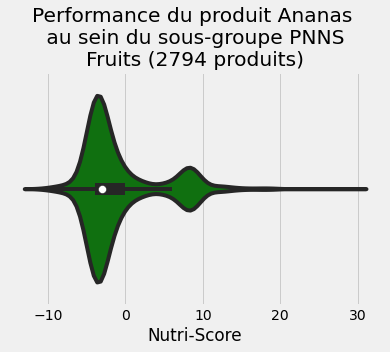

In [30]:
basePN=base2.loc[base['Sous-groupe PNNS 2']==Prod['Sous-groupe PNNS 2'],:]
basePN.loc[:,'rang']=basePN.loc[:,'Nutri-Score'].rank(method='min')
if len(basePN)<=1 :
    print("Il n'existe pas d'autres produits au sein de ce sous-groupe")
else :
    print ('Nombre de produits du même sous-groupe dans la base : {}'.format(len(basePN)))
    classviol(Prod, basePN, 'Sous-groupe PNNS 2','du sous-groupe PNNS','g')

Produit : Salade Fruits Exotiques


Energie : 50 kcal/100g
Graisses : 0.1 g
	dont Graisses saturées : 0.0 g
Glucides : 11.0 g
	dont Sucres : 11.0 g
Proteines : 0.5 g
Sel : 0.0 g


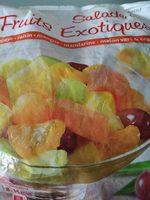

Nutri-Score : A
Note de Nutri-Score : -3
Vendu en France


________________

Produit : Compote de pomme
Marque : Valade,We bio!


Energie : 47 kcal/100g
Graisses : 0.5 g
	dont Graisses saturées : 0.1 g
Glucides : 10.6 g
	dont Sucres : 10.0 g
Proteines : 0.2 g
Sel : 0.01 g


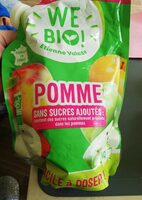

Nutri-Score : A
Note de Nutri-Score : -3
Vendu en France


________________

In [31]:
Class=basePN.loc[Ind,'rang']
basePN2=basePN.loc[basePN['rang']<Class]
if len(basePN2) <3:
    taille=len(basePN2)
else :
    taille =2
for i in range(taille):
    MeilProd=trouvemeilleur(basePN,Ind, Prod).iloc[i]
    AfficheProduit(MeilProd)

Nombre de produits du même groupe dans la base : 9890


/home/olivier/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/olivier/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/olivier/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


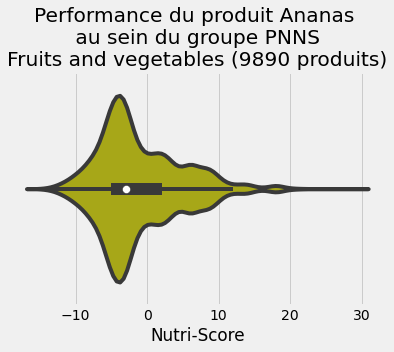

In [32]:
basePNN=base2.loc[base['Groupe PNNS 2']==Prod['Groupe PNNS 2'],:]
basePNN.loc[:,'rang']=basePNN.loc[:,'Nutri-Score'].rank(method='min')
if len(basePNN)<=1 :
    print("Il n'existe pas d'autres produits au sein de ce groupe")
else :
    print ('Nombre de produits du même groupe dans la base : {}'.format(len(basePNN)))
    classviol(Prod, basePNN, 'Groupe PNNS 2','du groupe PNNS','y')

Produit : Compote Pommes-Figues sans sucres ajoutés
Marque : Charles & Alice


Energie : 57 kcal/100g
Graisses : 0.5 g
	dont Graisses saturées : 0.2 g
Glucides : 13.0 g
	dont Sucres : 11.0 g
Proteines : 0.6 g
Sel : 0.01 g


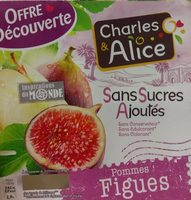

Nutri-Score : A
Note de Nutri-Score : -3
Vendu en France


________________

Produit : Cup Ananas avec une touche de Coco Sans Sucres Ajoutés
Marque : St Mamet


Energie : 50 kcal/100g
Graisses : 0.0 g
	dont Graisses saturées : 0.0 g
Glucides : 12.0 g
	dont Sucres : 11.0 g
Proteines : 0.0 g
Sel : 0.0 g


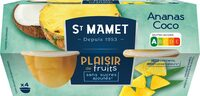

Nutri-Score : A
Note de Nutri-Score : -3
NOVA group : 4
Distribué par : Magasins U
Vendu en France


________________

In [33]:
Class=basePNN.loc[Ind,'rang']
basePNN2=basePNN.loc[basePNN['rang']<Class]
if len(basePNN2) <3:
    taille=len(basePNN2)
else :
    taille =2
for i in range(taille):
    MeilProd=trouvemeilleur(basePNN,Ind, Prod).iloc[i]
    AfficheProduit(MeilProd)

In [34]:
ii=base['Nom Produit 2S'].value_counts()>5
iii=ii[ii==True].index
iii[200:250]

Index(['chipolat superieur', 'spaghet', 'poitrin fume', 'foi gras canard',
       'lomo adobado', 'jambon superieur couen', 'beaufort', 'pain mi',
       'nougat', 'pain seigl', 'goud', 'hach parmenti', 'rot filet porc',
       'confitur myrtill', 'sauc strasbourg', 'riz basmat',
       'rot porc cuit superieur', 'steak hach', 'queso viejo tostado',
       'noix coco', 'paupiet veau', 'goud jeun', 'saumon atlant fum',
       'choucrout garn', 'pomm terr', 'costill barbaco cortad', 'galet rois',
       'galet breton', 'lentill vert', 'fond chocolat', 'yaourt',
       'saumon fum norveg', 'tomm savoi', 'mouss pur canard', 'pat feuillete',
       'escargot bourgogn', 'compot pomm', 'noix cajou cru', 'pain campagn',
       'buch chevr', 'sauc viand', 'blanquet veau', 'sirop menth',
       'ratatouill', 'haricot vert tre fin', 'bri meau',
       'parmigiano reggiano dop', 'bai goj seche', 'chip',
       'chulet cerdo sajoni'],
      dtype='object')